# Decision Tree 실습

# 1. 함수 익히기 및 모듈 불러오기

- 함수 익히기

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [2]:
clf.predict([[1, 1]])

array([1])

- 모듈 불러오기

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
from os import system
import pandas as pd

In [4]:
import graphviz

- 데이터 로드

In [5]:
iris=load_iris()

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2. 의사결정나무 구축 및 시각화

- 트리 구축

In [7]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(iris.data,iris.target)

- 트리의 시각화

In [8]:
dot_data=tree.export_graphviz(clf,out_file=None,
                             feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True,
                              rounded=True,
                              special_characters=True
                             )

In [9]:
graph = graphviz.Source(dot_data)

- 엔트로피를 활용한 트리

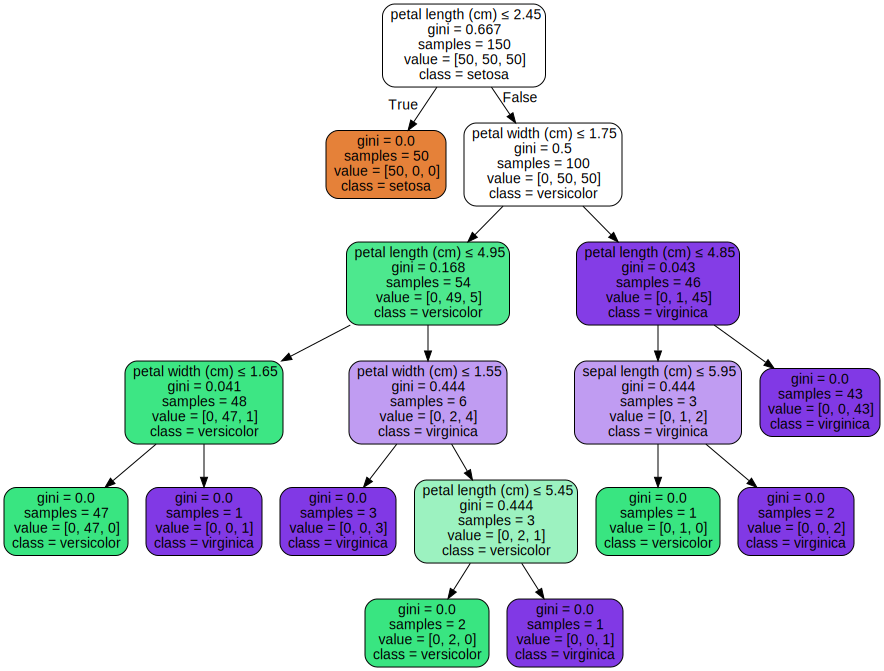

In [10]:
graph

### Entropy를 이용한 classifier

In [ ]:
clf2=tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf2=clf2.fit(iris.data, iris.target)

In [ ]:
dot_data2=tree.export_graphviz(clf2,out_file=None,
                             feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True,
                              rounded=True,
                              special_characters=True
                             )

In [ ]:
graph2 = graphviz.Source(dot_data2)

In [ ]:
graph2

### 프루닝

In [ ]:
clf3=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
# max_depth 말고도, gini나 entropy의 최저구간을 정한다거나, 나눌 수 있는 가지의 갯수를 정한다거나 할 수도 있다.

In [ ]:
clf3=clf3.fit(iris.data,iris.target)

In [ ]:
dot_data3=tree.export_graphviz(clf3,out_file=None,
                             feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True,
                              rounded=True,
                              special_characters=True
                             )

In [ ]:
graph3 = graphviz.Source(dot_data3)

In [ ]:
graph3

### Confusion Matrix 구하기

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target,clf.predict(iris.data))

In [ ]:
# Tree의 경우 training set에 과적합시키면 거의 다 맞춘다.
confusion_matrix(iris.target,clf2.predict(iris.data))

In [ ]:
# 프루닝을 한 경우
confusion_matrix(iris.target,clf3.predict(iris.data))

# 3. Training - Test 구분 및 Confusion matrix 계산

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    stratify=iris.target, random_state=1)

# 데이터가 많지 않은 경우, 특히 희소한 y 범주가 있다면, stratify를 통해서
# test set에도 희소한 y 범주가 적당히 포함되도록 할 수 있다.

In [ ]:
clf4=tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf4=clf4.fit(X_train,y_train)

In [ ]:
# training으로 fitting하고, y_test에 대한 confusion matrix
    # predict를 하는데, clf4.predict를 한다. 뭐를 가지고? X_test를 가지고 predict한다.
confusion_matrix(y_test,clf4.predict(X_test))

# 4. Decision regression tree

- 모듈 불러오기 및 데이터 생성

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)  # 0~1 사이 균등분포 랜덤숫자를 80행1열로 만들고, 각각에 5를 곱하고, sort해준다.
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- Regression tree 구축

In [ ]:
regr1=tree.DecisionTreeRegressor(max_depth=2)
regr2=tree.DecisionTreeRegressor(max_depth=5)

In [ ]:
regr1.fit(X,y)

In [ ]:
regr2.fit(X,y)

In [ ]:
X_test = np.arange(0.0, 5.0, 0.01)[:,np.newaxis]
X_test

In [ ]:
y_1=regr1.predict(X_test)
y_2=regr2.predict(X_test)

In [ ]:
y_1

In [ ]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
dot_data4 = tree.export_graphviz(regr2, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

In [ ]:
graph4 = graphviz.Source(dot_data4) 
graph4